<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [14]:
dados = pd.read_csv('/home/avemaria/Documentos/Códigos/Bootcamp/Estatistica-com-Python/860-Exercicio/Exercicio/dados/HousePrices_HalfMil.csv',sep=';')

## Visualizar os dados

In [15]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [16]:
dados.shape

(1000, 7)

### O dataset possui 1000 registros com 7 colunas.

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [17]:
dados.describe()

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


#### *Média de preços* = \$ 41985.6
#### *Desvio* = \$ 12140.38
#### *Menor preço* = \$ 13150
#### *Maior preço* = \$ 73675

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [18]:
dados.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


### <font color = 'lightgreen'>Análises:</font>
*   As variáveis de maior correlação com preço são `andares` (n. de andares) e `marmore` (se há revestimento em mármore). 
*   O relacionamento é **positivo**, i.e, conforme há mais andares ou mais móveis com mármore o preço aumenta.
*   As variáveis explicativas (garagem, banheiro, etc) possuem **baixa correlação** entre si, com valores inferiores a 0.07, positiva ou negativa.

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Módulos utilizados: biblioteca seaborn

## Configure o estilo e cor dos gráficos (opcional)

In [132]:
# sns.set_palette('Set2')
sns.set_style('darkgrid')

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 0, 'Preços $')

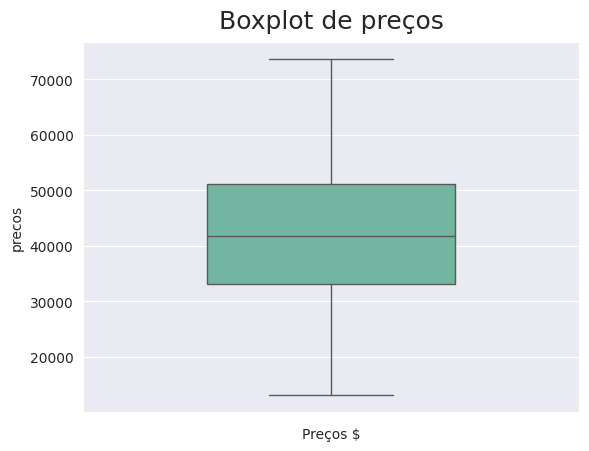

In [58]:
ax = sns.boxplot(data=dados['precos'], orient='v',width=0.5)
ax.set_title('Boxplot de preços', fontsize=18,pad=10)
ax.set_xlabel('Preços $', fontsize=10)

### <font color='lightgreen'>Análises</font>
*   Não são identificáveis *outliers* nos extremos do gráfico.
*   Podemos ver que a posição dos quartis está bastante centralizada e os quartis possuem tamanho semelhante. Logo, apresenta um comportamento estável.

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<Axes: title={'center': 'Boxplot de preços por vagas de garagem'}, xlabel='Vagas de garagem', ylabel='Preços $'>

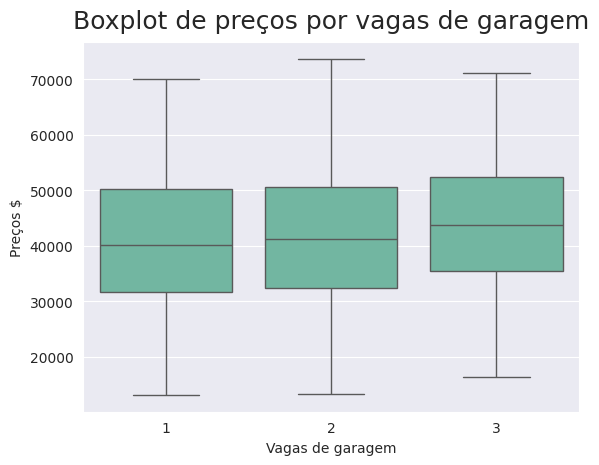

In [59]:
ax = sns.boxplot(data=dados,y='precos',x='garagem', orient='v')
ax.set_title('Boxplot de preços por vagas de garagem', fontsize=18,pad=10)
ax.set_xlabel('Vagas de garagem', fontsize=10)
ax.set_ylabel('Preços $', fontsize=10)
ax

### Box-plot (Preço X Banheiros)

Text(0, 0.5, 'Preços $')

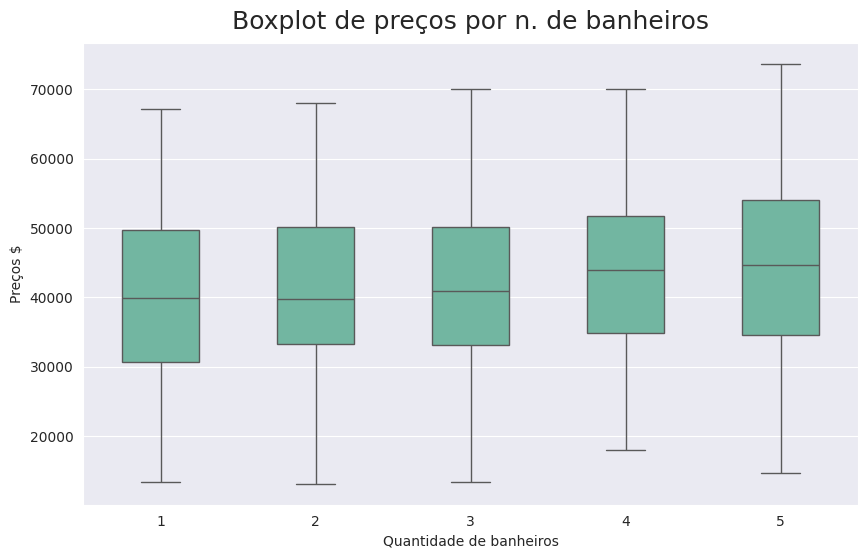

In [70]:
ax = sns.boxplot(y='precos',x='banheiros', data=dados, orient='v',width=0.5)
ax.figure.set_size_inches(10,6)
ax.set_title('Boxplot de preços por n. de banheiros', fontsize=18,pad=10)
ax.set_xlabel('Quantidade de banheiros', fontsize=10)
ax.set_ylabel('Preços $', fontsize=10)

### Box-plot (Preço X Lareira)

Text(0, 0.5, 'Preços $')

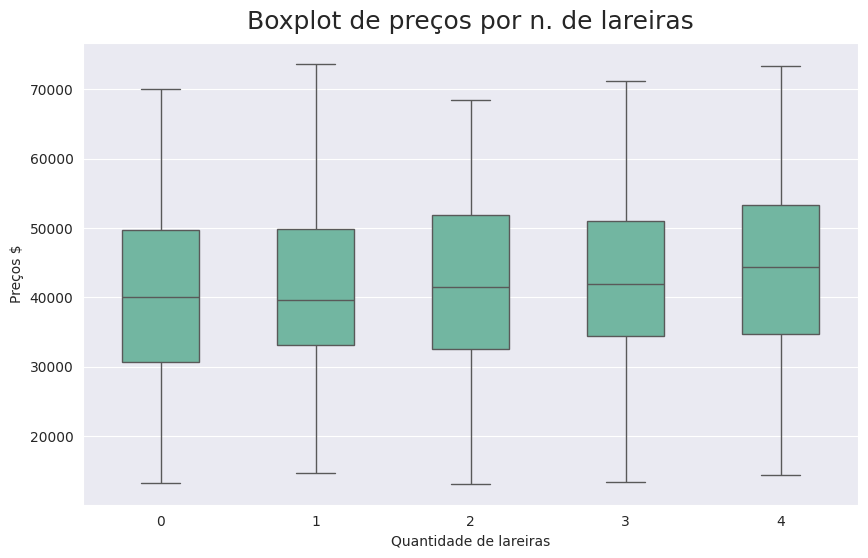

In [74]:
ax = sns.boxplot(y='precos',x='lareira', data=dados, orient='v',width=0.5)
ax.figure.set_size_inches(10,6)
ax.set_title('Boxplot de preços por n. de lareiras', fontsize=18,pad=10)
ax.set_xlabel('Quantidade de lareiras', fontsize=10)
ax.set_ylabel('Preços $', fontsize=10)

### Box-plot (Preço X Acabamento em Mármore)

Text(0, 0.5, 'Preços $')

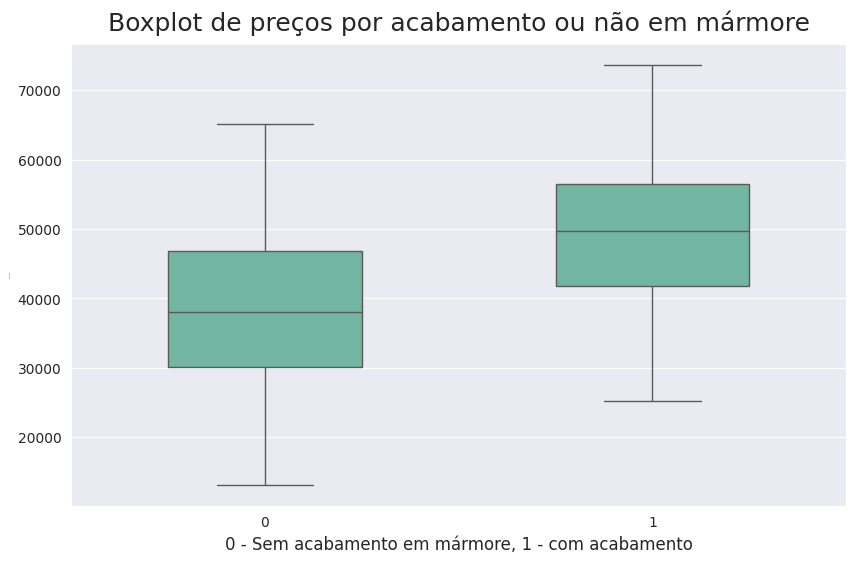

In [78]:
ax = sns.boxplot(y='precos',x='marmore', data=dados, orient='v',width=0.5)
ax.figure.set_size_inches(10,6)
ax.set_title('Boxplot de preços por acabamento ou não em mármore', fontsize=18,pad=10)
ax.set_xlabel('0 - Sem acabamento em mármore, 1 - com acabamento', fontsize=12)
ax.set_ylabel('Preços $', fontsize=1)

### Como foi possível observar na matriz de correlação, o acabamento em mármore em um dos fatores mais influentes no preço.

### Box-plot (Preço X Andares)

Text(0, 0.5, 'Preços $')

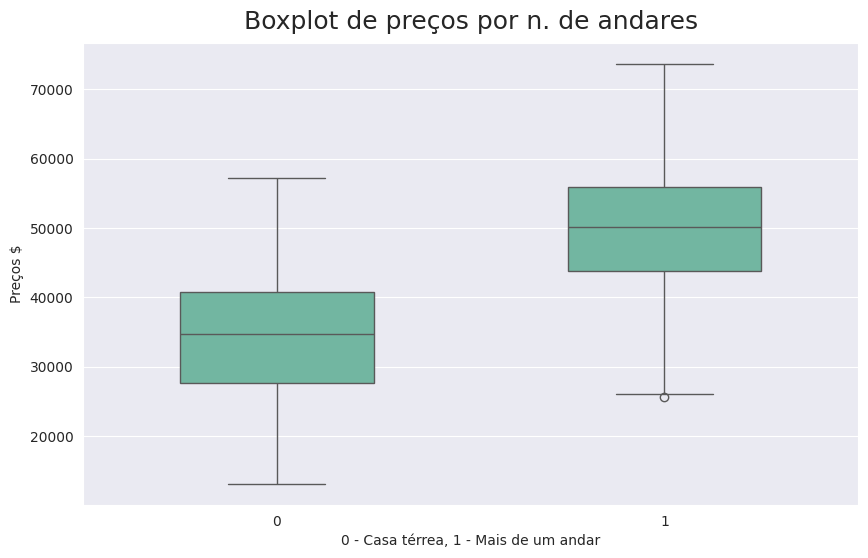

In [77]:
ax = sns.boxplot(y='precos',x='andares', data=dados, orient='v',width=0.5)
ax.figure.set_size_inches(10,6)
ax.set_title('Boxplot de preços por n. de andares', fontsize=18,pad=10)
ax.set_xlabel('0 - Casa térrea, 1 - Mais de um andar', fontsize=10)
ax.set_ylabel('Preços $', fontsize=10)

#### Nesse boxplot já podemos observar *outliers* nos imóveis com acabamento em mármore.

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

#### Análise de distribuição com histograma

Text(0, 0.5, 'Frequência')

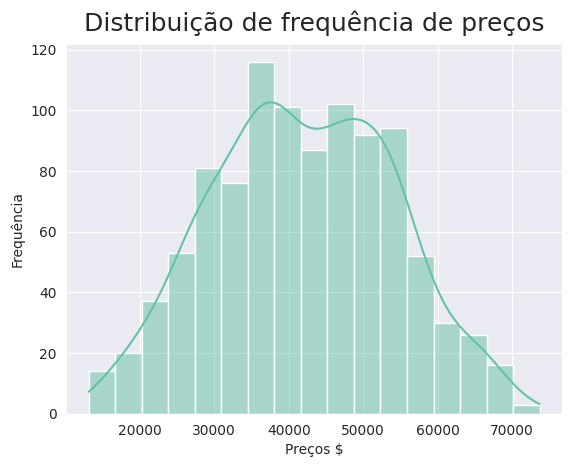

In [84]:
ax = sns.histplot(data=dados['precos'], kde=True)
ax.set_title('Distribuição de frequência de preços', fontsize=18,pad=10)
ax.set_xlabel('Preços $', fontsize=10)
ax.set_ylabel('Frequência', fontsize=10)

### Pelo gŕafico, a distribuição se assemelha a uma normal. Podemos testar essa hipótese com `normaltest()`:

In [94]:
from scipy.stats import normaltest

### Em um teste de normalidade, se o $p-valor$ é **menor ou igual** que a significância, rejeitamos a hipótese nula.
### Nesse caso, `normaltest` testa a hipótese nula de os dados estarem em uma distruibuição normal.

In [102]:
teste = normaltest(dados['precos'])
pvalor = teste[1]
print('É uma distruibuição normal?\n', pvalor>0.055)
print('p-valor: {}'.format(pvalor))

É uma distruibuição normal?
 False
p-valor: 1.2776405063525777e-06


### Temos um $p-valor$ muito pequeno, por isso rejeitamos a hipótese nula. I.e, **não temos uma distrubuição normal**.

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

/home/avemaria/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Dispersão entre variáveis de preço dos imóveis')

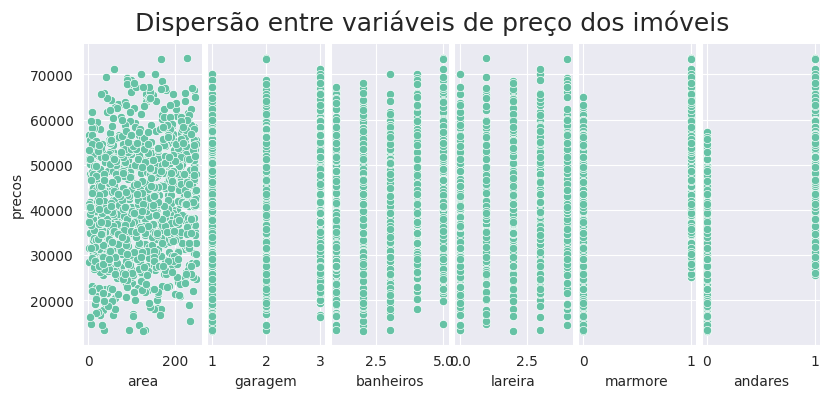

In [127]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area','garagem','banheiros','lareira','marmore','andares'])
ax.fig.set_size_inches(8,4)
ax.fig.suptitle('Dispersão entre variáveis de preço dos imóveis',
                fontsize=18,y=1.05)

### <font color='lightgreen'>Análises:</font>
*   Área apresenta uma grande dispersão em relação ao preço
*   A presença de acabamento em mármore ou a casa ter mais de um andar aumentam significativamente o preço, como visto na matriz de correlação.

### Para verificar um relação *linear* mais facilmente podemos acrescentar uma reta:

/home/avemaria/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Dispersão entre variáveis de preço dos imóveis')

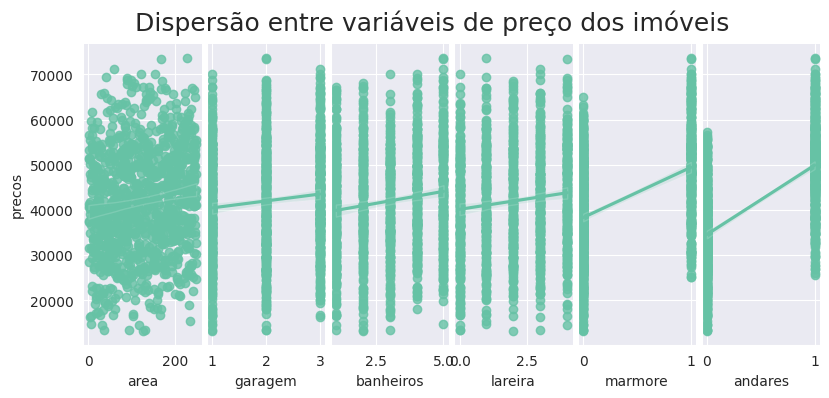

In [137]:
ax = sns.pairplot(
    dados, y_vars='precos', 
    x_vars=['area','garagem','banheiros','lareira','marmore','andares'],
    kind='reg'
)
ax.fig.set_size_inches(8,4)
ax.fig.suptitle('Dispersão entre variáveis de preço dos imóveis',
                fontsize=18,y=1.05)

### Assim como visto na matriz de correlação, a correlação das variáveis explicativas com o preço é *positiva*.
### Podemos observar uma relção expressiva com relação ao tamanho do imóvel n. de vagas, acabamento em mármore e se é um sobrado. Isso corresponde aos resultados de `corr()`

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Módulos: *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [138]:
y_preco = dados['precos']
type(y_preco)

pandas.core.series.Series

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [140]:
x = dados[['area','garagem','banheiros','lareira','marmore','andares']]
x.head()

,area,garagem,banheiros,lareira,marmore,andares
0,25,3,4,3,0,1
1,35,1,3,1,0,0
2,195,2,4,2,0,0
3,33,2,2,1,0,1
4,11,2,3,0,0,1


## Criando os datasets de treino e de teste

In [142]:
x_train, x_test, preco_train, preco_test = train_test_split(x,y_preco,test_size=0.3,random_state=2811)

### Usando o mesmo `random_state` das video aulas criamos o mesmo conjunto e podemos comparar resultados.

## Requisitos: *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando a classe *LinearRegression()*

In [143]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [144]:
modelo.fit(x_train,preco_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [161]:
print('Coeficiente de correlação R²: {}'.format(
    modelo.score(x_train,preco_train).round(3)
    )
)

Coeficiente de correlação R²: 0.636


### $R^2$ representa o quanto as variáveis explicativas determinam o comportamento do preço. No modelo temos um valor mediano.
### Para obter um coeficiente de correlação maior, precisamos obter mais dados. Porém há um limite para inserir mais dados sem gerar um valor articialmente grande.

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [153]:
preco_previsto = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [159]:
print(
    'R² para previsões: {:.3f}'.format(
        metrics.r2_score(preco_test,preco_previsto)
    )
)

R² para previsões: 0.670


### `metrics.r2_score()` compara previsões com o valor real da variável dependente $Y$ e `score()` compara os valores previstos e reais das variáveis explicativas.

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [167]:
def previsao(a, gar, bth, l, mr, andar):
    x = [[a,gar,bth,l,mr,andar]]
    print('Preço previsto: ${:.2f}'.format(modelo.predict(x)[0]))

previsao(38,2,4,4,0,1)
previsao(38,2,4,4,1,0)
previsao(38,2,4,4,0,0)

Preço previsto: $46389.80
Preço previsto: $42659.97
Preço previsto: $31528.21


/home/avemaria/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/avemaria/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/avemaria/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Podemos verificar como as variáveis com mais influência (mármore e andares) variam o preço.

# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para modelo de preços previsto

In [170]:
eqm = metrics.mean_squared_error(preco_test,preco_previsto).round(2)
reqm = np.sqrt(eqm).round(2)
r2 = metrics.r2_score(preco_test,preco_previsto).round(2)
pd.DataFrame([eqm,reqm,r2],['Erro quadrático médio', 'Raiz do erro quadrático médio','R²'],columns=['Métricas de qualidade do modelo'])

,Métricas de qualidade do modelo
Erro quadrático médio,50197019.50
Raiz do erro quadrático médio,7084.99
R²,0.67


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

### <font color='darkred'> Nota:</font> O curso demonstra o uso da biblioteca `pickle`, porém ela possui falhas de segurança notórias:
https://scikit-learn.org/stable/model_persistence.html
https://medium.com/ochrona/python-pickle-is-notoriously-insecure-d6651f1974c9

## Alternativa: biblioteca `skops`

In [172]:
import skops.io as sio

## Salvando o modelo estimado

In [176]:
output = sio.dump(modelo,"modelo.skops")

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import skops.io as sio

lm_new = sio.load("modelo.skops",Trusted=True)
# unknown_types = sio.get_untrusted_types(file="modelo")
# loaded_model = io.load("pipeline.skops", trusted=unknown_types)

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```

### <font color='darkred'> Somente use o parâmetro `Trusted = True` se você confia **100%** na segurança do arquivo sendo aberto. </font>